<a href="https://colab.research.google.com/github/saket2343/Titanic-Survival-Prediction/blob/main/Titanic-Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# **Data loading**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/titanic_dataset.csv')

In [ ]:
df = data

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


A passenger with Embarked = S boarded the Titanic at Southampton.

A passenger with Embarked = C boarded at Cherbourg.

A passenger with Embarked = Q boarded at Queenstown.

In [ ]:
def cato_to_num(s):
  s = str(s)
  if s=='Q':
    return 0
  elif s=='S':
    return 1
  elif s=='C':
    return 2

df['Embarked'] = df['Embarked'].apply(cato_to_num)

In [ ]:
def cato_to_num_sex(s):
  s = str(s)
  if s=='male':   # male represented by 0
    return 0
  elif s=='female': # female represented by 1
    return 1

df['Sex'] = df['Sex'].apply(cato_to_num_sex)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,2
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1
416,1308,0,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,1


In [ ]:
df.shape

(418, 12)

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


# **Data Cleaning**

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-86-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,NaN,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,2
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1
416,1308,0,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,NaN,1


In [ ]:
df.drop('Cabin',axis=1, inplace=True) # deleting cabin column

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,1


In [ ]:
df.shape

(418, 11)

In [ ]:
df=df.dropna() # delete the remaining nan values row wise if any present

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# **Data Analysis**

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,0.364508,29.525180,0.448441,0.393285,35.627188,1.134293
std,120.923774,0.481870,0.842077,0.481870,12.628258,0.897568,0.982419,55.907576,0.581112
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1101.000000,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,1205.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Survived', ylabel='Fare'>

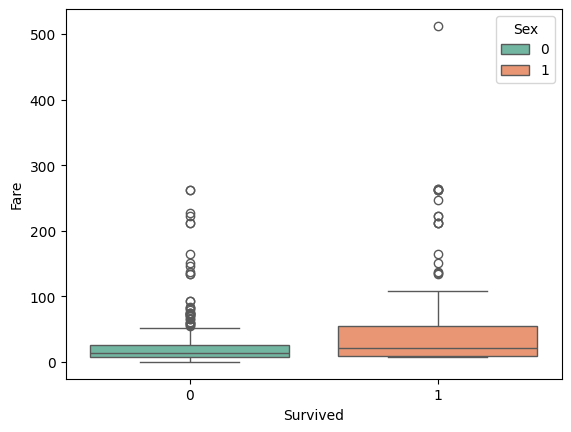

In [ ]:
sns.boxplot(data=df, x='Survived', y='Fare', hue='Sex', palette='Set2')

In [ ]:
fare_m = df[df['Sex']==0].Fare.mean()    # avg fare price paid by male passengers
fare_f = df[df['Sex']==1].Fare.mean()  # avg fare price paid by female passengers

print(fare_m)
print(fare_f)

27.527876981132078
49.747698684210526


In [ ]:
avg_m = df[df['Sex']==0]  # avg survival rate of male passenger
avg_f = df[df['Sex']==1].Survived.mean() # avg survival rate of female passenger

we can clearly interpret that the avg price paid by male passenger is greater than the avg price paid by female passenger (fare_f > fare_m) and also males survival rate is less on titanic compared to female passengers.

In [ ]:
df[(df['Sex']==0)].Survived.sum()
df[df['Sex']==1].Survived

,Survived
1,1
4,1
6,1
8,1
12,1
...,...
409,1
410,1
411,1
412,1


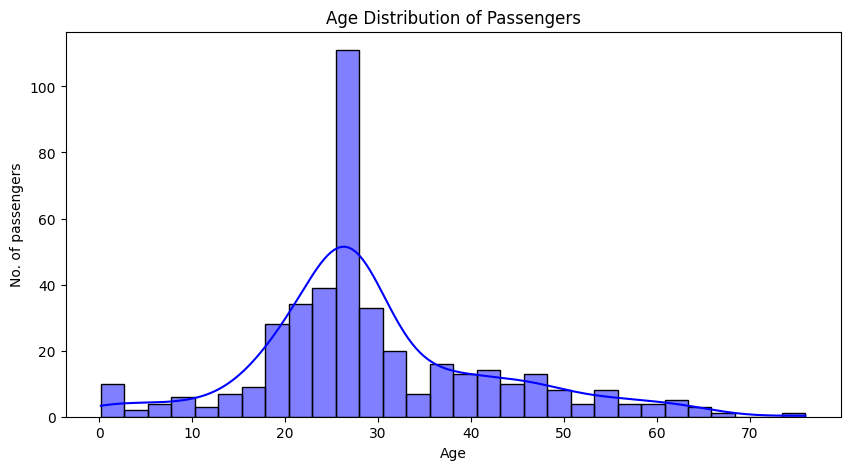

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('No. of passengers')
plt.show()

Based on this graph we can interpret that the most of Passengers lie between the age group of 20-30, lowest age is 0 years while the highest age is 76 years

<ipython-input-100-4866aee24f96>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='Set2')


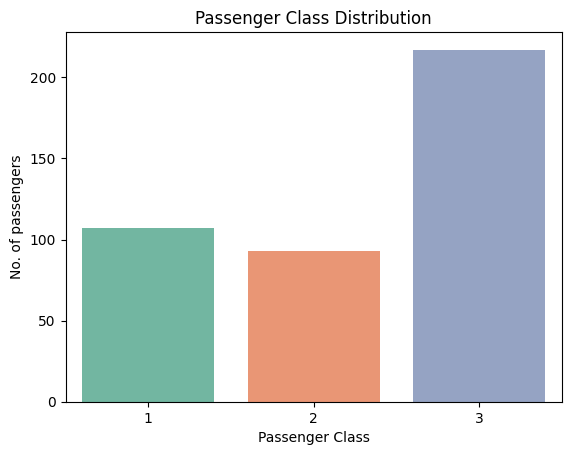

In [ ]:
sns.countplot(data=df, x='Pclass', palette='Set2')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('No. of passengers')
plt.show()

Based on the graph we can interpret that the most of the passengers are travelling in 3rd class, 1st class and then 2nd class

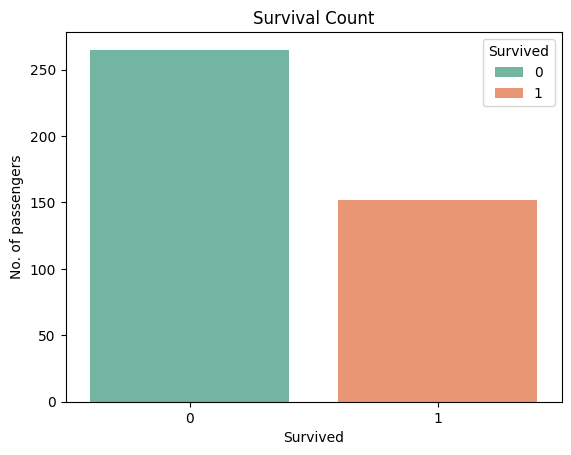

In [ ]:
sns.countplot(x='Survived', data=df, hue='Survived', palette='Set2')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('No. of passengers')
plt.show()

In [ ]:
n_pass_sur = df[df['Survived']==1].Survived.sum()
per_pass_sur = (n_pass_sur/df.shape[0])*100
print(per_pass_sur)
print(n_pass_sur)

36.45083932853717
152


From the Graph of No. of passengers vs survived, the number of passengers survived is 152, which is nearly 36.45% of the total passengers, which clearly shows that the most of the passengers are died

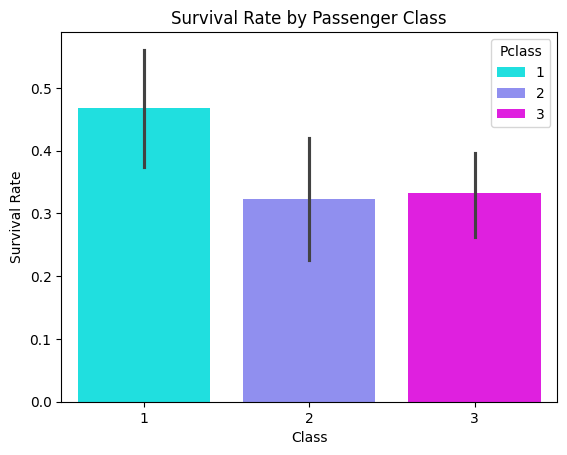

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df, hue='Pclass', palette='cool')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Class')
plt.show()

Here in the graph we can able to interpret that the 1st classs had better chances of survival, even though 3rd class people had more people compared to others, staying in class 2nd was better as its no. of people was lowest but its survival rate is same as 3rd class. means in 2nd and 1st class people survived more.

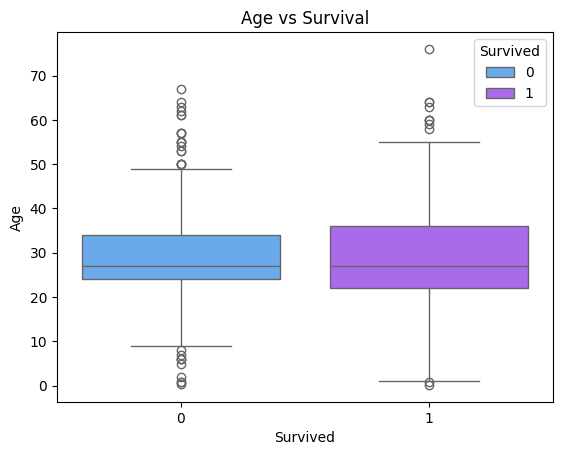

In [ ]:
sns.boxplot(y='Age', x='Survived', data=df, hue='Survived', palette='cool')
plt.title('Age vs Survival')
plt.ylabel('Age')
plt.xlabel('Survived')
plt.show()

Text(0, 0.5, 'Survival Rate')

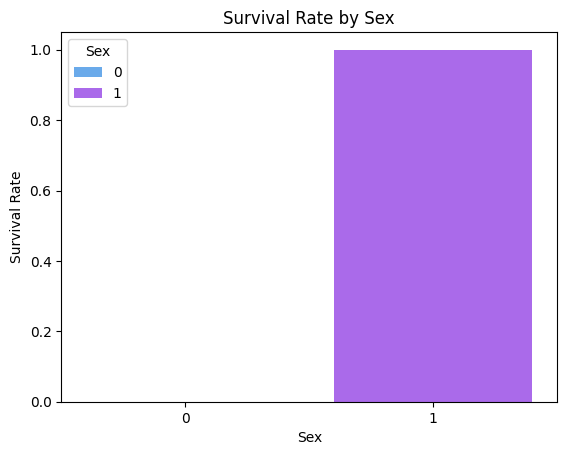

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df, hue='Sex', palette='cool')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

<ipython-input-106-b930b9e243bc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Survived', y='Fare', data=df, palette='cool')


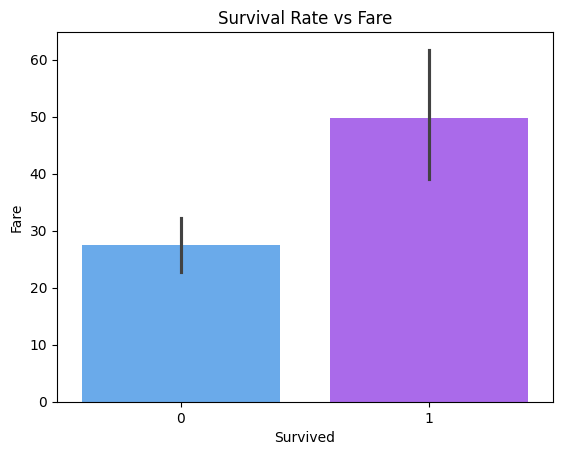

In [ ]:
sns.barplot(x='Survived', y='Fare', data=df, palette='cool')
plt.title('Survival Rate vs Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

**People who paid more survived more**

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,2
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,1
416,1308,0,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,1


<ipython-input-108-afbf0bf19e26>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette='cool')


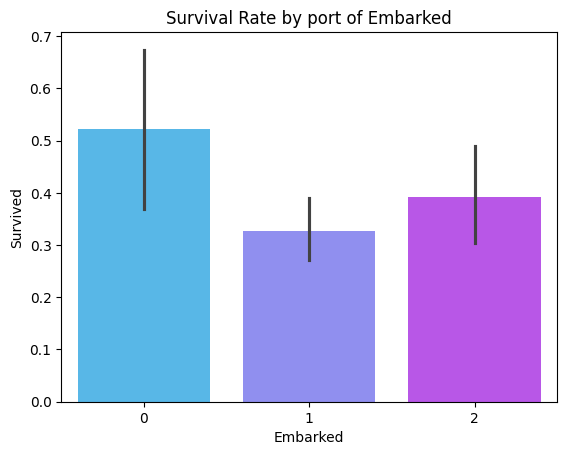

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=df, palette='cool')
plt.title('Survival Rate by port of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.show()

Text(0.5, 1.0, 'age vs fare with survived and person class')

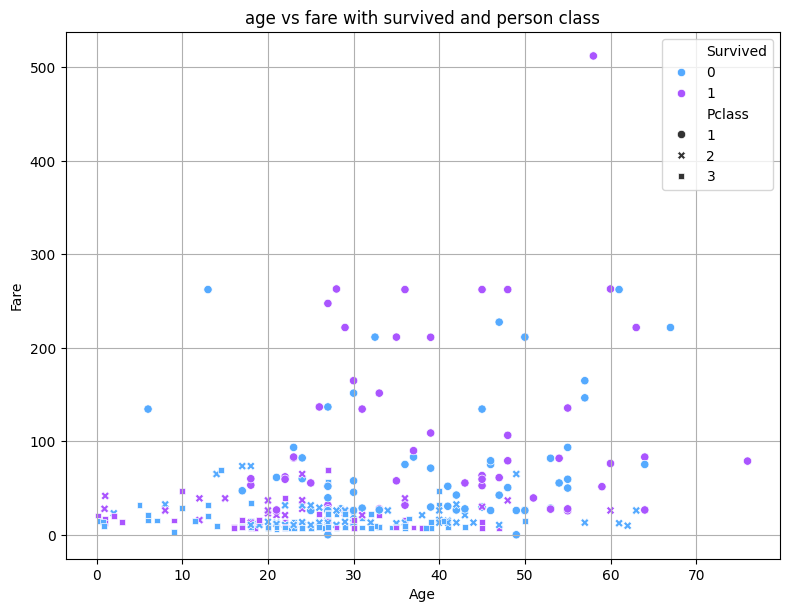

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='cool', style='Pclass')
plt.grid(True)
plt.tight_layout()
plt.title('age vs fare with survived and person class')

Most people paid less than 50 dollars for their ticket, but one person paid over 500 dollars, was in first class, and survived. That shows rich people had better survival chances. Many passengers in third class paid very low fares and most of them died. First-class people had more survivors, but some of them sitll died. Survival was more related to class and money than age. Young or old didn't matter much. This shows that money and class helped, bu didn't guarantee life.

<Figure size 800x600 with 0 Axes>

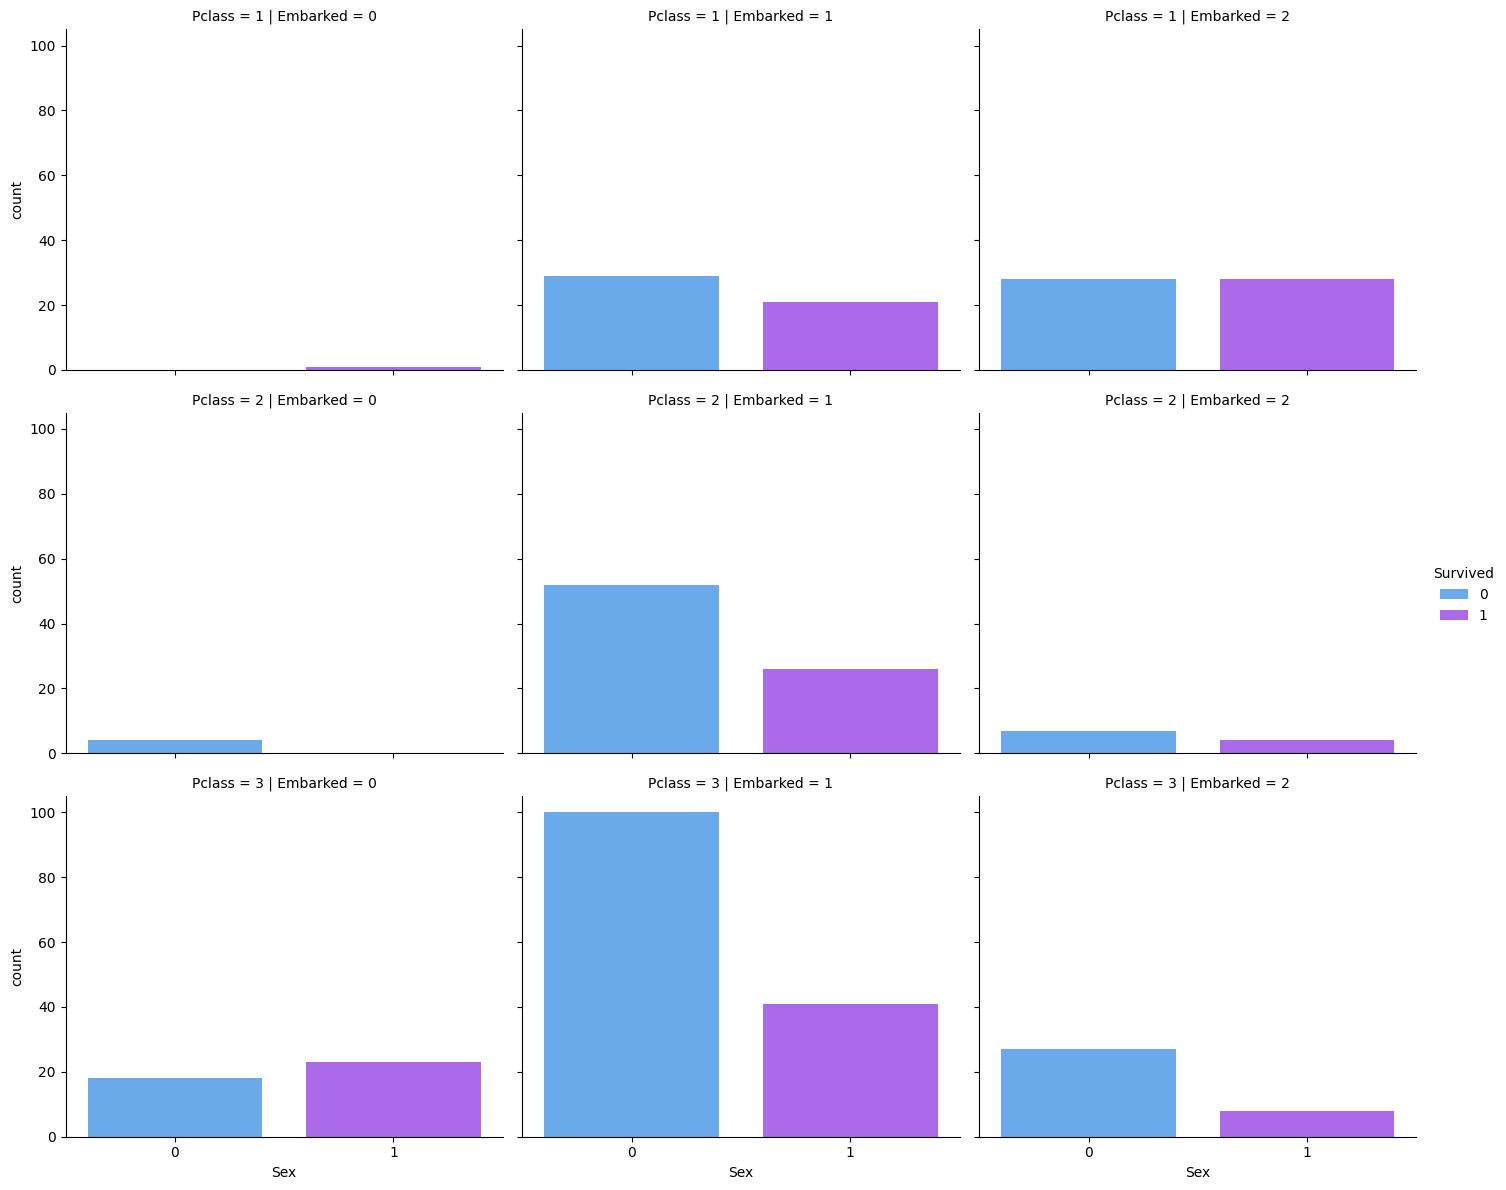

In [ ]:
plt.figure(figsize=(8,6))
sns.catplot(x='Sex', hue='Survived', col='Embarked', row='Pclass', kind='count', data=df, height=4, aspect=1.2, palette='cool')
plt.show()

Most first-class passengers came from Southampton (S) and Cherbourg (C), with very few from Queenstown (Q) — possibly just one woman.
Second-class had mainly males from Southampton, with few from Queenstown and not many from Cherbourg.
Third-class had many from Queenstown and Southampton, including both males and females, likely due to higher population or more young travelers in those areas.






<Axes: >

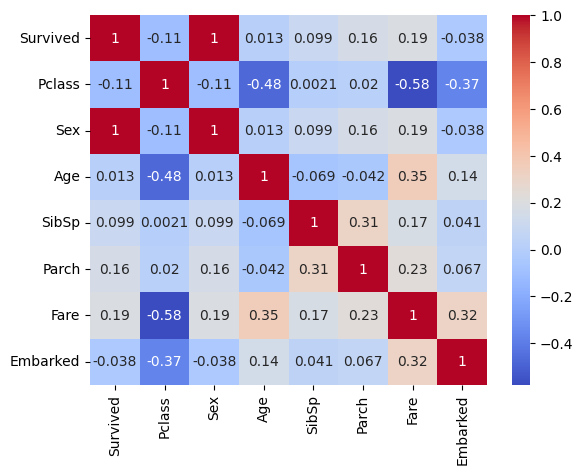

In [ ]:
sns.heatmap(df.drop(columns=['PassengerId']).corr(numeric_only=True), annot=True, cmap='coolwarm')

People who had paid more,mostly from 1st class, survived more. Their fare was high, and that linked to better cabins and access to lifeboats. People with parents/children (Parch) or siblings/spouses(SibSp) also had a slight survival boost.
Younger people often came with families, which is why age is negatively correlated with SibSp/Parch. Rich old people probably traveling alone - were in 1st class and paid more, explaining positive correlation between age and fare.
However, there's no single strong predictor alone - but when we see fare+class+Family+Age together, we start to see how survival was shaped

# **Model Building**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
X = df.drop(['Survived','PassengerId','Name','Ticket'], axis=1) # droping the irrelevent information
y = df['Survived']

Feature Scaling

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,0
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,0
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,1
414,1,1,39.0,0,0,108.9000,2
415,3,0,38.5,0,0,7.2500,1
416,3,0,27.0,0,0,8.0500,1


In [ ]:
y

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (333, 7)
X_test shape: (84, 7)
y_train shape: (333,)
y_test shape: (84,)


Logistic Regression

In [ ]:
log_model = LogisticRegression(penalty='l2', C=0.01)  # More regularization
log_scores = cross_val_score(log_model, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression CV Accuracy:", log_scores)

log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("\n[Logistic Regression Results]")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("F1 Score:", f1_score(y_test, log_preds))
print(classification_report(y_test, log_preds))

Logistic Regression CV Accuracy: [0.73134328 0.65671642 0.65671642 0.59090909 0.72727273]

[Logistic Regression Results]
Accuracy: 0.7023809523809523
F1 Score: 0.4186046511627907
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        50
           1       1.00      0.26      0.42        34

    accuracy                           0.70        84
   macro avg       0.83      0.63      0.61        84
weighted avg       0.80      0.70      0.65        84



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Reduce complexity
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],  # shallower trees
    'min_samples_split': [4, 6],
    'min_samples_leaf': [2, 4]
}


grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy'
)
grid_rf.fit(X_train, y_train)

# Best model and evaluation
best_rf_model = grid_rf.best_estimator_
best_rf_preds = best_rf_model.predict(X_test)

print("Best Parameters:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, best_rf_preds))
print("F1 Score:", f1_score(y_test, best_rf_preds))
print(classification_report(y_test, best_rf_preds))

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}
Accuracy: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

